In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/breanna-s/Mental-Health-Chatbot/refs/heads/main/Combined%20Data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [41]:
df.isnull().sum()


Unnamed: 0      0
statement     362
status          0
dtype: int64

In [42]:
df.dropna(how='any', axis=0, inplace=True)
df.isnull().sum()

Unnamed: 0    0
statement     0
status        0
dtype: int64

In [43]:
# Counts for each Mental Health status
df["status"].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

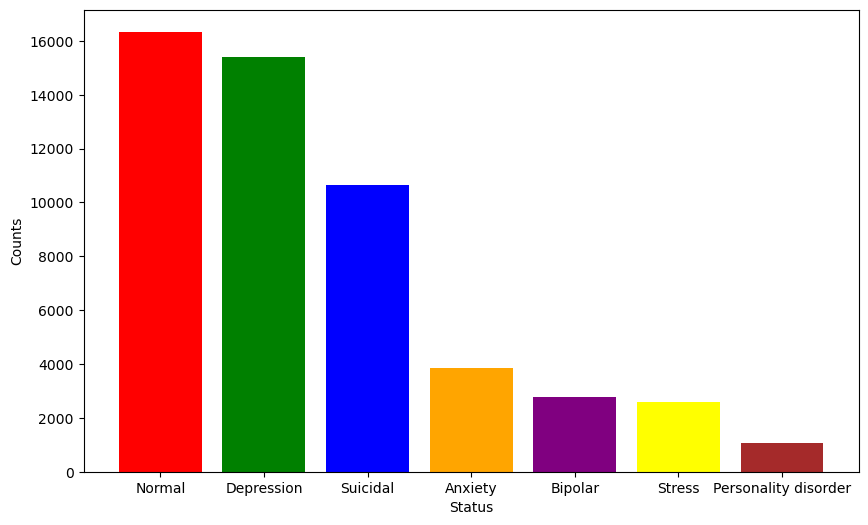

In [44]:
# Visualization of distribution of each Mental Health Status
s_count = df["status"].value_counts()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown'] 

plt.figure(figsize=(10,6))
plt.bar(s_count.index, s_count.values, color=colors[:len(s_count)])
plt.xlabel("Status")
plt.ylabel("Counts")
plt.show()

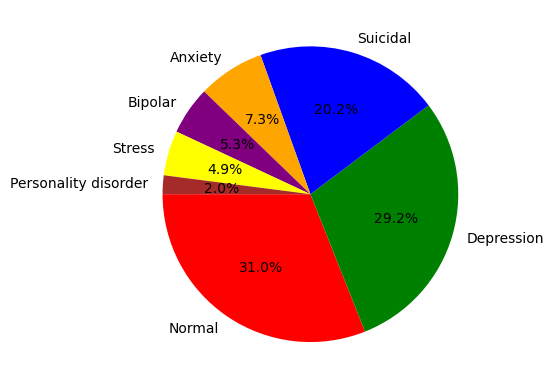

In [45]:
#data is skewed so will need to fix that at some point, shown as pie chart
colors =  ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown'] 
plt.pie(s_count, labels=s_count.index, autopct='%.1f%%', colors=colors, startangle=180)
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1)) #this prevents a random print for some reason

   
#status: ('Suicidal', 36299)
#statement: @realDonaldTrump It already is! At least in France one doesn't die/loss everything when get sick &amp; have at least 1â¦ https://t.co/QYN3ku1Q8T

In [46]:
#get random values for each of the status types as examples
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1))
for status, statement in random_statements.items():
    print(f"status: {status}")
    print(f"statement: {statement}", end="\n\n-----------------------------------------------\n")

status: ('Anxiety', 51997)
statement: I can’t even vent to my friends and family anymore because they’ll definitely think I’m crazy :( I have terrible anxiety from exams. Especially after the exam is over, I make scenarios in my head like I’m going to fail or get accused of cheating by the monitor because they told me to stop talking twice. This time, I forgot to write down the time I came back from the bathroom (they have this paper we have to write when we left and came back from the room). Usually they write the time after we give ID but this time for some reason we had to do it all. I did write down the time I got out but I didn’t write down the time I came back (left twice and yup forgot twice). Usually we don’t have to do this so that’s why I forgot. I’m worried this might get me in trouble because there’s no way they can know the time I actually came back to the exam room… ugh I know it’s dumb but dammit if they notice this it might actually get me in trouble 🤦🏻‍♀️🤦🏻‍♀️🤦🏻‍♀️

--

In [47]:
import re
#convert the statements all to lower case to keep tokenization consistent
df['statement'] = df['statement'].str.lower()
#remove puncuation, markdown, urls, special chars
def remove_special_inputs(text):
    text = re.sub(r"http[s]?://\S+","",text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', "", text)
    # Remove handles (that start with '@')
    text = re.sub(r"@\w+","",text)
    # Remove punctuation and other special characters
    text = re.sub(r"[^\w\s]","",text)
    return text
df['statement'] = df['statement'].apply(remove_special_inputs)
df.head()


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,all wrong back off dear forward doubt stay in ...,Anxiety
3,3,ive shifted my focus to something else but im ...,Anxiety
4,4,im restless and restless its been a month now ...,Anxiety
